In [1]:
#Import Library
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading Data into DataFrames
#Concat function to join all the DataFrames into one DataFrame
hpd_train_df = pd.concat(
   map(pd.read_csv, ['200401hpd.txt','200403hpd.txt','200405hpd.txt','200407hpd.txt','200409hpd.txt','200411hpd.txt']), ignore_index=True)

In [3]:
hpd_train_df.shape

(7697386, 4)

In [4]:
hpd_train_df.head()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,3034,20040101,10,0.0
1,3035,20040101,10,0.0
2,3039,20040101,10,0.0
3,3040,20040101,10,0.0
4,4128,20040101,10,0.0


In [5]:
#Checking for null values
hpd_train_df.isna().sum()

WeatherStationID         0
YearMonthDay             0
Time                     0
HourlyPrecip        251266
dtype: int64

In [6]:
#removing empty rows in a DataFrame
hpd_train_df.dropna(inplace=True,axis=0)

In [7]:
hpd_train_df.isna().sum()

WeatherStationID    0
YearMonthDay        0
Time                0
HourlyPrecip        0
dtype: int64

In [8]:
hpd_train_df.shape

(7446120, 4)

In [9]:
hpd_train_df = hpd_train_df.groupby(["YearMonthDay","WeatherStationID"],as_index=False).agg({"HourlyPrecip":np.mean})

In [10]:
#Reading Hourly Precipitate Data
hours_train_df = pd.concat(
   map(pd.read_csv, ['200401hourly.txt','200403hourly.txt','200405hourly.txt','200407hourly.txt','200409hourly.txt','200411hourly.txt']), ignore_index=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_6220\2163694782.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hours_train_df = pd.concat(
C:\Users\Asus\AppData\Local\Temp\ipykernel_6220\2163694782.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hours_train_df = pd.concat(
C:\Users\Asus\AppData\Local\Temp\ipykernel_6220\2163694782.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hours_train_df = pd.concat(
C:\Users\Asus\AppData\Local\Temp\ipykernel_6220\2163694782.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hours_train_df = pd.concat(


In [11]:
hours_train_df.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [12]:
hours_train_df.shape

(6485177, 12)

In [13]:
hours_train_df.isna().sum()

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               162260
Visibility                  151688
DBT                        1162698
DewPointTemp               1176789
RelativeHumidityPercent    1179911
WindSpeed                    33407
WindDirection                33392
WindGustValue                43844
StationPressure             805551
dtype: int64

In [14]:
hours_train_df.dropna(axis=0,inplace=True)

In [15]:
hours_train_df.shape

(5115765, 12)

In [16]:
hours_train_df.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

In [17]:
hours_train_df["Visibility"].value_counts()

10SM     3871417
7SM       281851
5SM       160291
9SM       131228
4SM       115349
          ...   
18SM           1
54SM           1
100SM          1
74SM           1
17SM           1
Name: Visibility, Length: 66, dtype: int64

In [18]:
hours_train_df["Visibility"]= hours_train_df["Visibility"].str.extract("(\d+)").astype(float)

In [19]:
hours_train_df["Visibility"].value_counts()

10.0     3871441
7.0       281852
5.0       160306
9.0       131228
4.0       115349
8.0       114061
6.0        95722
2.0        87304
3.0        87078
0.0        78700
1.0        74707
15.0       10667
12.0        3441
20.0         934
30.0         800
65.0         615
25.0         606
14.0         482
60.0         130
13.0         114
50.0         113
40.0          52
35.0          27
11.0           9
55.0           8
45.0           5
109.0          1
18.0           1
54.0           1
100.0          1
74.0           1
56.0           1
21.0           1
70.0           1
280.0          1
77.0           1
19.0           1
16.0           1
63.0           1
17.0           1
Name: Visibility, dtype: int64

In [20]:
hours_train_df.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

In [21]:
hours_train_df.loc[hours_train_df
                   ["WindDirection"]=="000"]=0

In [22]:
hours_train_df.isna().sum()

WeatherStationID           0
YearMonthDay               0
Time                       0
SkyConditions              0
Visibility                 0
DBT                        0
DewPointTemp               0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
WindGustValue              0
StationPressure            0
dtype: int64

In [23]:
#droping rows wher wind parameters are all equal to zero 
itsna = hours_train_df[(hours_train_df["WindSpeed"]==0)&(hours_train_df["WindDirection"]==0)&(hours_train_df["WindGustValue"]==0)].index
hours_train_df.drop(itsna,inplace=True)

In [24]:
hours_train_df.shape

(4233252, 12)

In [25]:
(hours_train_df["WindDirection"]=="VRB").sum()

176245

In [26]:

hours_train_df["WindDirection"] = hours_train_df["WindDirection"].replace("VRB","30")

In [27]:
hours_train_df["WindDirection"] = hours_train_df["WindDirection"].astype(float)

In [28]:
hours_train_df.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection              float64
WindGustValue              float64
StationPressure            float64
dtype: object

In [29]:
hours_train_df["WindSpeed"].value_counts()

5.0     377941
4.0     377037
6.0     355130
3.0     350155
7.0     325137
         ...  
54.0         1
96           1
71.0         1
73.0         1
-3           1
Name: WindSpeed, Length: 116, dtype: int64

In [30]:
hours_train_df["WindSpeed"] = hours_train_df["WindSpeed"].replace("/0",0)

In [31]:
hours_train_df["WindSpeed"] = hours_train_df["WindSpeed"].replace("/1",1)
hours_train_df["WindSpeed"] = hours_train_df["WindSpeed"].replace("/2",2)

In [32]:
hours_train_df["WindSpeed"] = hours_train_df["WindSpeed"].astype(float)

In [33]:
hours_train_df.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindDirection              float64
WindGustValue              float64
StationPressure            float64
dtype: object

In [34]:
hours_train_df = hours_train_df.groupby(["YearMonthDay","WeatherStationID"],as_index=False).agg({"WindDirection":np.mean,"Visibility":np.mean,"DBT":np.mean,"DewPointTemp":np.mean,"RelativeHumidityPercent":np.mean,"WindSpeed":np.mean,"WindGustValue":np.mean,"StationPressure":np.mean})

In [35]:
hours_train_df.shape

(187474, 10)

In [36]:
hours_train_df = hours_train_df.round(2)

In [37]:
hours_train_df.head(4)

,YearMonthDay,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure
0,20040101,3011,73.33,9.67,26.00,14.00,63.00,8.00,0.00,30.06
1,20040101,3012,196.18,10.00,33.24,20.49,61.15,7.04,3.36,30.15
2,20040101,3013,208.75,10.00,38.50,15.79,44.29,6.75,0.67,26.11
3,20040101,3016,148.00,9.00,33.40,22.27,67.13,4.73,0.00,24.44


In [38]:
hours_train_df["YearMonthDay"].value_counts()

20040712    1310
20040708    1308
20040730    1307
20040707    1307
20040701    1307
            ... 
20040303     815
20040322     815
20040306     815
20040307     815
20040314     815
Name: YearMonthDay, Length: 157, dtype: int64

In [39]:
weather = pd.merge(hours_train_df,hpd_train_df,how="right",on=["YearMonthDay","WeatherStationID"])

In [40]:
weather.shape

(255925, 11)

In [41]:
weather.head(40)

,YearMonthDay,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip
0,20040101,3011,73.33,9.67,26.00,14.00,63.00,8.00,0.00,30.06,0.000000
1,20040101,3012,196.18,10.00,33.24,20.49,61.15,7.04,3.36,30.15,0.000000
2,20040101,3013,208.75,10.00,38.50,15.79,44.29,6.75,0.67,26.11,0.000000
3,20040101,3016,148.00,9.00,33.40,22.27,67.13,4.73,0.00,24.44,0.000833
4,20040101,3017,174.17,10.00,40.96,9.58,28.75,8.29,0.00,24.43,0.000000
5,20040101,3024,224.58,10.00,56.29,24.50,29.71,13.79,14.29,26.84,0.000000
6,20040101,3026,180.83,10.00,40.33,10.42,33.04,10.67,0.00,25.58,0.000000
7,20040101,3027,267.39,10.00,34.96,23.13,63.09,18.26,7.91,23.15,0.000000
8,20040101,3028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
9,20040101,3029,186.00,10.00,37.10,29.70,74.90,8.20,0.00,23.49,0.000000


In [42]:
stations = pd.read_csv("AllStationsData_PHD.txt",sep ="|")

In [43]:
stations.shape

(1744, 8)

In [44]:
stations.dtypes

WeatherStationID      int64
AirportID            object
GroundHeight          int64
StationHeight         int64
BarometerHeight       int64
Latitude            float64
Longitude           float64
TimeZone             object
dtype: object

In [45]:
stations = stations.drop(["GroundHeight","StationHeight","BarometerHeight","Latitude","Longitude","TimeZone"],axis=1)

In [46]:
stations.dtypes

WeatherStationID     int64
AirportID           object
dtype: object

In [47]:
weather.dtypes

YearMonthDay                 int64
WeatherStationID             int64
WindDirection              float64
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

In [48]:
weatherfinal = pd.merge(weather,stations,how="left",on=["WeatherStationID"])

In [49]:
weatherfinal.shape

(255925, 12)

In [50]:
weatherfinal = weatherfinal.rename(columns={"YearMonthDay":"ArrivalDate","AirportID":"Destination"})

In [51]:

to_submit = weatherfinal
to_submit.to_csv("weatherfinal.csv",index=False)

In [52]:
weatherfinal.head(10)

,ArrivalDate,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip,Destination
0,20040101,3011,73.33,9.67,26.00,14.00,63.00,8.00,0.00,30.06,0.000000,TEX
1,20040101,3012,196.18,10.00,33.24,20.49,61.15,7.04,3.36,30.15,0.000000,SKX
2,20040101,3013,208.75,10.00,38.50,15.79,44.29,6.75,0.67,26.11,0.000000,LAA
3,20040101,3016,148.00,9.00,33.40,22.27,67.13,4.73,0.00,24.44,0.000833,RIL
4,20040101,3017,174.17,10.00,40.96,9.58,28.75,8.29,0.00,24.43,0.000000,DEN
5,20040101,3024,224.58,10.00,56.29,24.50,29.71,13.79,14.29,26.84,0.000000,BGD
6,20040101,3026,180.83,10.00,40.33,10.42,33.04,10.67,0.00,25.58,0.000000,ITR
7,20040101,3027,267.39,10.00,34.96,23.13,63.09,18.26,7.91,23.15,0.000000,CQC
8,20040101,3028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,SPD
9,20040101,3029,186.00,10.00,37.10,29.70,74.90,8.20,0.00,23.49,0.000000,RQE


In [53]:
weatherfinal.isna().sum()

ArrivalDate                    0
WeatherStationID               0
WindDirection              68472
Visibility                 68472
DBT                        68472
DewPointTemp               68472
RelativeHumidityPercent    68472
WindSpeed                  68472
WindGustValue              68472
StationPressure            68472
HourlyPrecip                   0
Destination                   61
dtype: int64

In [54]:
(weatherfinal["Destination"]==0).sum()

0

In [55]:
train = pd.read_csv("Train.csv")

In [56]:
train.shape

(7861, 12)

In [57]:
train.dtypes

FlightNumber              object
Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
ScheduledDepTime           int64
ScheduledArrTime           int64
ScheduledTravelTime        int64
Origin                    object
Destination               object
Distance                   int64
ActualArrivalTimeStamp    object
dtype: object

In [58]:
train["DayofMonth"]= train.DayofMonth.map("{:02}".format)

In [59]:
train["Month"]= train.Month.map("{:02}".format)

In [60]:
train.dtypes

FlightNumber              object
Year                       int64
Month                     object
DayofMonth                object
DayOfWeek                  int64
ScheduledDepTime           int64
ScheduledArrTime           int64
ScheduledTravelTime        int64
Origin                    object
Destination               object
Distance                   int64
ActualArrivalTimeStamp    object
dtype: object

In [61]:
train["YearMonthDay"]=train["Year"].astype(str)+train["Month"].astype(str)+train["DayofMonth"].astype(str)

In [62]:
train.head(5)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,YearMonthDay
0,BOS_CLE_29089,2004,09,20,1,1000,1154,114,BOS,CLE,563,20-09-2004 11:54,20040920
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19-11-2004 18:55,20041119
2,SNA_LAS_44378,2004,05,04,2,1800,1902,62,SNA,LAS,226,04-05-2004 19:02,20040504
3,CLT_TPA_51502,2004,07,06,2,1400,1533,93,CLT,TPA,508,06-07-2004 15:33,20040706
4,MSP_ORD_44884,2004,09,23,4,830,946,76,MSP,ORD,334,23-09-2004 09:46,20040923


In [63]:
train["ActualArrivalTimeStamp"]= train["ActualArrivalTimeStamp"].astype(object)
train[['ArrivalDate','ArrivalTime']]= train.ActualArrivalTimeStamp.str.split(" ",expand=True)
#train["ArrivalDate","ArrivalTime"].astype(int)
train.drop(["ActualArrivalTimeStamp"],axis=1,inplace=True)

In [64]:
train.head(5)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,ArrivalDate,ArrivalTime
0,BOS_CLE_29089,2004,09,20,1,1000,1154,114,BOS,CLE,563,20040920,20-09-2004,11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,20041119,19-11-2004,18:55
2,SNA_LAS_44378,2004,05,04,2,1800,1902,62,SNA,LAS,226,20040504,04-05-2004,19:02
3,CLT_TPA_51502,2004,07,06,2,1400,1533,93,CLT,TPA,508,20040706,06-07-2004,15:33
4,MSP_ORD_44884,2004,09,23,4,830,946,76,MSP,ORD,334,20040923,23-09-2004,09:46


In [65]:
train["ScheduledDepTime"]=train.ScheduledDepTime.map("{:04}".format)
train["ScheduledArrTime"]=train.ScheduledArrTime.map("{:04}".format)

In [66]:
train.head(4)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,ArrivalDate,ArrivalTime
0,BOS_CLE_29089,2004,09,20,1,1000,1154,114,BOS,CLE,563,20040920,20-09-2004,11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,20041119,19-11-2004,18:55
2,SNA_LAS_44378,2004,05,04,2,1800,1902,62,SNA,LAS,226,20040504,04-05-2004,19:02
3,CLT_TPA_51502,2004,07,06,2,1400,1533,93,CLT,TPA,508,20040706,06-07-2004,15:33


In [67]:
train["ArrivalTime"]=pd.to_numeric(train.ArrivalTime.str.replace(":",""))

In [68]:
train.head(4)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,ArrivalDate,ArrivalTime
0,BOS_CLE_29089,2004,09,20,1,1000,1154,114,BOS,CLE,563,20040920,20-09-2004,1154
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,20041119,19-11-2004,1855
2,SNA_LAS_44378,2004,05,04,2,1800,1902,62,SNA,LAS,226,20040504,04-05-2004,1902
3,CLT_TPA_51502,2004,07,06,2,1400,1533,93,CLT,TPA,508,20040706,06-07-2004,1533


In [69]:
train["ArrivalDate"] = pd.to_datetime(train["ArrivalDate"])
train["ArrivalDate"] = train.ArrivalDate.dt.strftime("%Y%m%d").astype(str)
train["ArrivalTime"]=train.ArrivalTime.map("{:04}".format)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20-09-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-11-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-09-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-09-2004' in DD/MM/YYYY format. Provide format or specify in

In [70]:
train.head(5)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,ArrivalDate,ArrivalTime
0,BOS_CLE_29089,2004,09,20,1,1000,1154,114,BOS,CLE,563,20040920,20040920,1154
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,20041119,20041119,1855
2,SNA_LAS_44378,2004,05,04,2,1800,1902,62,SNA,LAS,226,20040504,20040405,1902
3,CLT_TPA_51502,2004,07,06,2,1400,1533,93,CLT,TPA,508,20040706,20040607,1533
4,MSP_ORD_44884,2004,09,23,4,0830,0946,76,MSP,ORD,334,20040923,20040923,0946


In [71]:
train["FlightDelayStatus"] = train["ArrivalTime"].astype(int)-train["ScheduledArrTime"].astype(int)
train["FlightDelayStatus"] = train["FlightDelayStatus"].apply(lambda x:1 if(x>15) else 2)

In [72]:
train.head(4)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,ArrivalDate,ArrivalTime,FlightDelayStatus
0,BOS_CLE_29089,2004,09,20,1,1000,1154,114,BOS,CLE,563,20040920,20040920,1154,2
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,20041119,20041119,1855,1
2,SNA_LAS_44378,2004,05,04,2,1800,1902,62,SNA,LAS,226,20040504,20040405,1902,2
3,CLT_TPA_51502,2004,07,06,2,1400,1533,93,CLT,TPA,508,20040706,20040607,1533,2


In [73]:
train["FlightDelayStatus"].value_counts()

2    6347
1    1514
Name: FlightDelayStatus, dtype: int64

In [74]:
train = train.drop(["Year","Month","DayofMonth","DayOfWeek","FlightNumber"],axis=1)

In [75]:
train.head(5)

,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,ArrivalDate,ArrivalTime,FlightDelayStatus
0,1000,1154,114,BOS,CLE,563,20040920,20040920,1154,2
1,1440,1634,114,CLE,ATL,554,20041119,20041119,1855,1
2,1800,1902,62,SNA,LAS,226,20040504,20040405,1902,2
3,1400,1533,93,CLT,TPA,508,20040706,20040607,1533,2
4,0830,0946,76,MSP,ORD,334,20040923,20040923,0946,2


In [76]:
train.dtypes

ScheduledDepTime       object
ScheduledArrTime       object
ScheduledTravelTime     int64
Origin                 object
Destination            object
Distance                int64
YearMonthDay           object
ArrivalDate            object
ArrivalTime            object
FlightDelayStatus       int64
dtype: object

In [77]:
weatherfinal.dtypes

ArrivalDate                  int64
WeatherStationID             int64
WindDirection              float64
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
Destination                 object
dtype: object

In [78]:
train.ArrivalDate = train.ArrivalDate.astype(str)
weatherfinal.ArrivalDate = weatherfinal.ArrivalDate.astype(str)

In [79]:
trainfinal = pd.merge(train,weatherfinal,how = "left",on=["Destination","ArrivalDate"])

In [80]:
trainfinal.shape

(7861, 20)

In [81]:
trainfinal.head(20)

,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,ArrivalDate,ArrivalTime,FlightDelayStatus,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip
0,1000,1154,114,BOS,CLE,563,20040920,20040920,1154,2,14820.0,130.50,10.00,60.50,45.30,61.20,6.00,0.00,29.49,0.000000
1,1440,1634,114,CLE,ATL,554,20041119,20041119,1855,1,13874.0,153.81,6.19,59.00,52.57,80.14,5.67,0.00,29.08,0.004000
2,1800,1902,62,SNA,LAS,226,20040504,20040405,1902,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1400,1533,93,CLT,TPA,508,20040706,20040607,1533,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0830,0946,76,MSP,ORD,334,20040923,20040923,0946,2,94846.0,187.73,9.45,72.77,53.18,53.36,7.05,2.41,29.43,0.000000
5,1730,1832,62,CVG,GRR,268,20040926,20040926,1832,2,94860.0,164.17,10.00,65.08,45.92,54.00,3.92,0.00,29.34,0.000000
6,1330,1517,107,DFW,STL,551,20040505,20040505,1517,2,13994.0,172.50,9.40,71.30,56.55,62.60,6.30,0.80,29.20,0.000000
7,0655,0758,63,ACV,SFO,250,20040915,20040915,0758,2,23234.0,257.50,9.70,67.70,55.75,67.60,11.35,0.00,29.73,0.000000
8,1425,1625,120,BHM,DFW,597,20040528,20040528,1839,1,3927.0,121.11,9.28,79.61,64.33,63.39,6.33,0.00,29.20,0.000000
9,0847,1223,156,DFW,PIT,1068,20040911,20041109,1223,2,94823.0,260.83,10.00,38.25,23.08,55.58,5.50,0.00,29.18,0.000000


In [82]:
trainfinal.isna().sum()

ScheduledDepTime              0
ScheduledArrTime              0
ScheduledTravelTime           0
Origin                        0
Destination                   0
Distance                      0
YearMonthDay                  0
ArrivalDate                   0
ArrivalTime                   0
FlightDelayStatus             0
WeatherStationID           1644
WindDirection              1915
Visibility                 1915
DBT                        1915
DewPointTemp               1915
RelativeHumidityPercent    1915
WindSpeed                  1915
WindGustValue              1915
StationPressure            1915
HourlyPrecip               1644
dtype: int64

In [83]:
trainfinal.isna().sum()

ScheduledDepTime              0
ScheduledArrTime              0
ScheduledTravelTime           0
Origin                        0
Destination                   0
Distance                      0
YearMonthDay                  0
ArrivalDate                   0
ArrivalTime                   0
FlightDelayStatus             0
WeatherStationID           1644
WindDirection              1915
Visibility                 1915
DBT                        1915
DewPointTemp               1915
RelativeHumidityPercent    1915
WindSpeed                  1915
WindGustValue              1915
StationPressure            1915
HourlyPrecip               1644
dtype: int64

In [84]:
trainfinal.shape

(7861, 20)

In [85]:
trainfinal.head(10)

,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,ArrivalDate,ArrivalTime,FlightDelayStatus,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip
0,1000,1154,114,BOS,CLE,563,20040920,20040920,1154,2,14820.0,130.50,10.00,60.50,45.30,61.20,6.00,0.00,29.49,0.000
1,1440,1634,114,CLE,ATL,554,20041119,20041119,1855,1,13874.0,153.81,6.19,59.00,52.57,80.14,5.67,0.00,29.08,0.004
2,1800,1902,62,SNA,LAS,226,20040504,20040405,1902,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1400,1533,93,CLT,TPA,508,20040706,20040607,1533,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0830,0946,76,MSP,ORD,334,20040923,20040923,0946,2,94846.0,187.73,9.45,72.77,53.18,53.36,7.05,2.41,29.43,0.000
5,1730,1832,62,CVG,GRR,268,20040926,20040926,1832,2,94860.0,164.17,10.00,65.08,45.92,54.00,3.92,0.00,29.34,0.000
6,1330,1517,107,DFW,STL,551,20040505,20040505,1517,2,13994.0,172.50,9.40,71.30,56.55,62.60,6.30,0.80,29.20,0.000
7,0655,0758,63,ACV,SFO,250,20040915,20040915,0758,2,23234.0,257.50,9.70,67.70,55.75,67.60,11.35,0.00,29.73,0.000
8,1425,1625,120,BHM,DFW,597,20040528,20040528,1839,1,3927.0,121.11,9.28,79.61,64.33,63.39,6.33,0.00,29.20,0.000
9,0847,1223,156,DFW,PIT,1068,20040911,20041109,1223,2,94823.0,260.83,10.00,38.25,23.08,55.58,5.50,0.00,29.18,0.000


In [86]:
trainfinal["FlightDelayStatus"].value_counts()

2    6347
1    1514
Name: FlightDelayStatus, dtype: int64

In [87]:
trainfinal = trainfinal.drop("Origin",axis=1)
trainfinal = trainfinal.drop("ArrivalTime",axis=1)
trainfinal = trainfinal.drop("WeatherStationID",axis=1)
trainfinal = trainfinal.drop("YearMonthDay",axis=1)

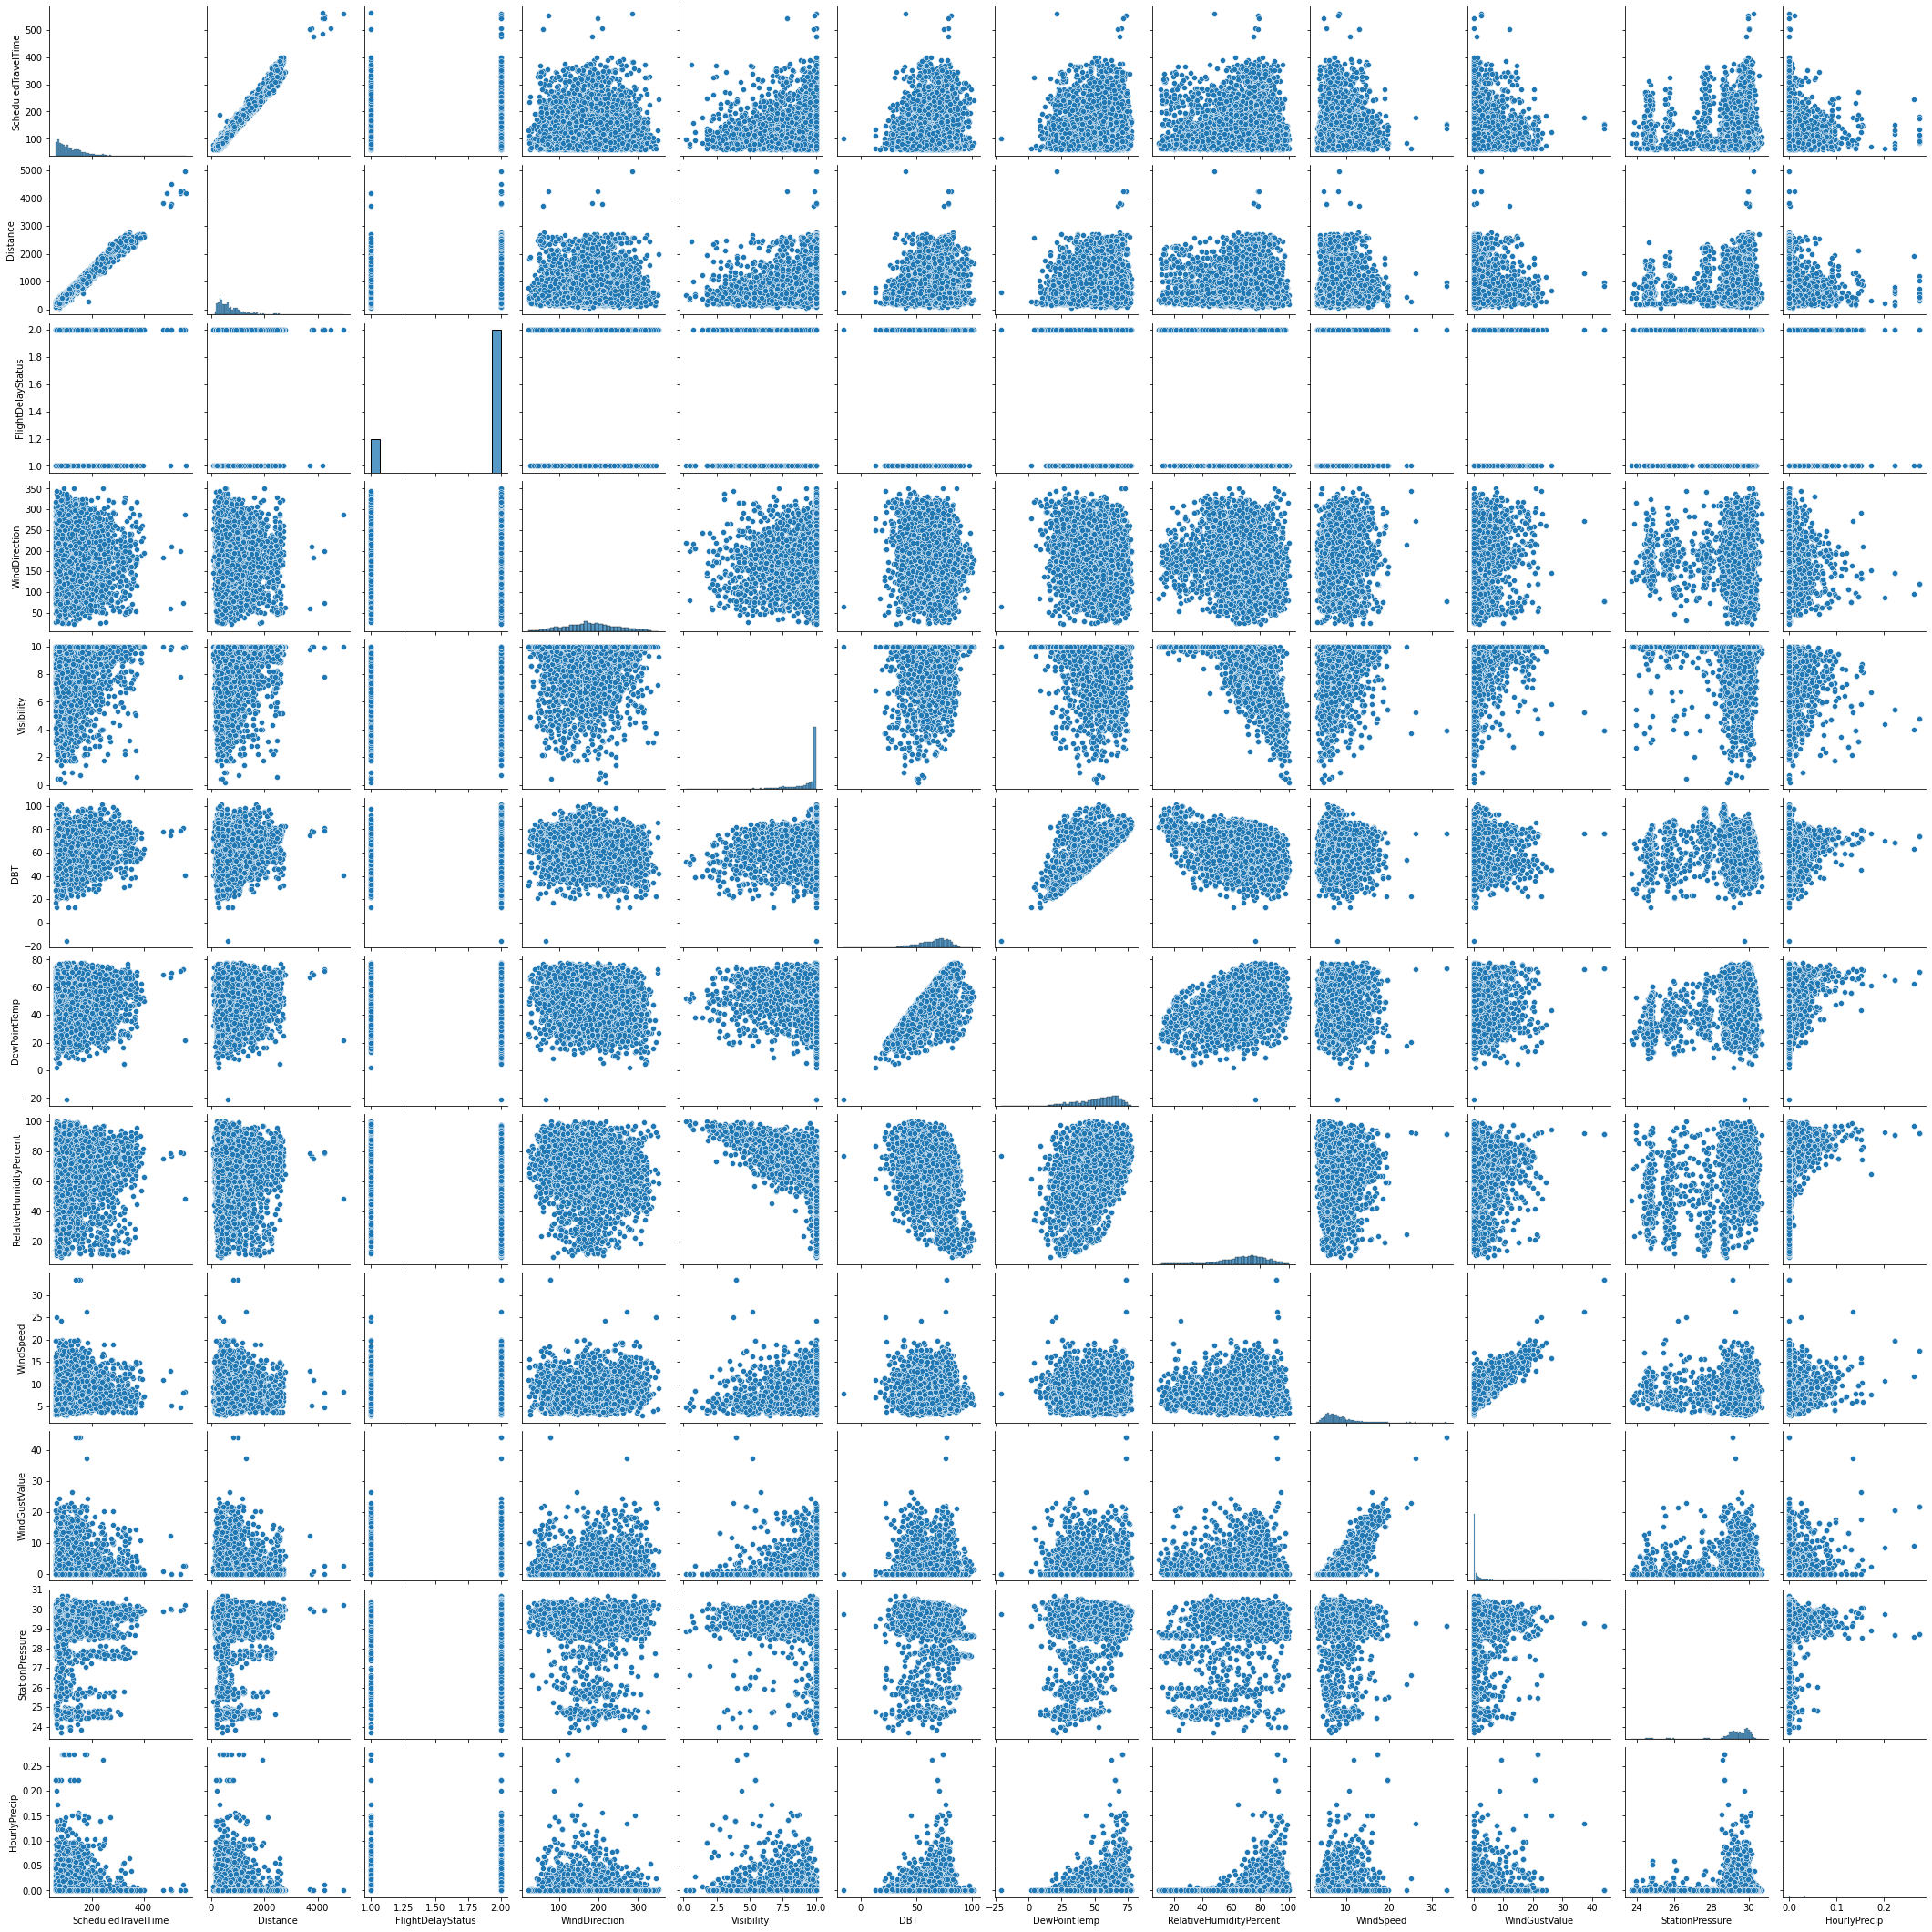

In [88]:
sns.pairplot(trainfinal)

array([[<AxesSubplot:title={'center':'ScheduledTravelTime'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'FlightDelayStatus'}>],
       [<AxesSubplot:title={'center':'WindDirection'}>,
        <AxesSubplot:title={'center':'Visibility'}>,
        <AxesSubplot:title={'center':'DBT'}>],
       [<AxesSubplot:title={'center':'DewPointTemp'}>,
        <AxesSubplot:title={'center':'RelativeHumidityPercent'}>,
        <AxesSubplot:title={'center':'WindSpeed'}>],
       [<AxesSubplot:title={'center':'WindGustValue'}>,
        <AxesSubplot:title={'center':'StationPressure'}>,
        <AxesSubplot:title={'center':'HourlyPrecip'}>]], dtype=object)

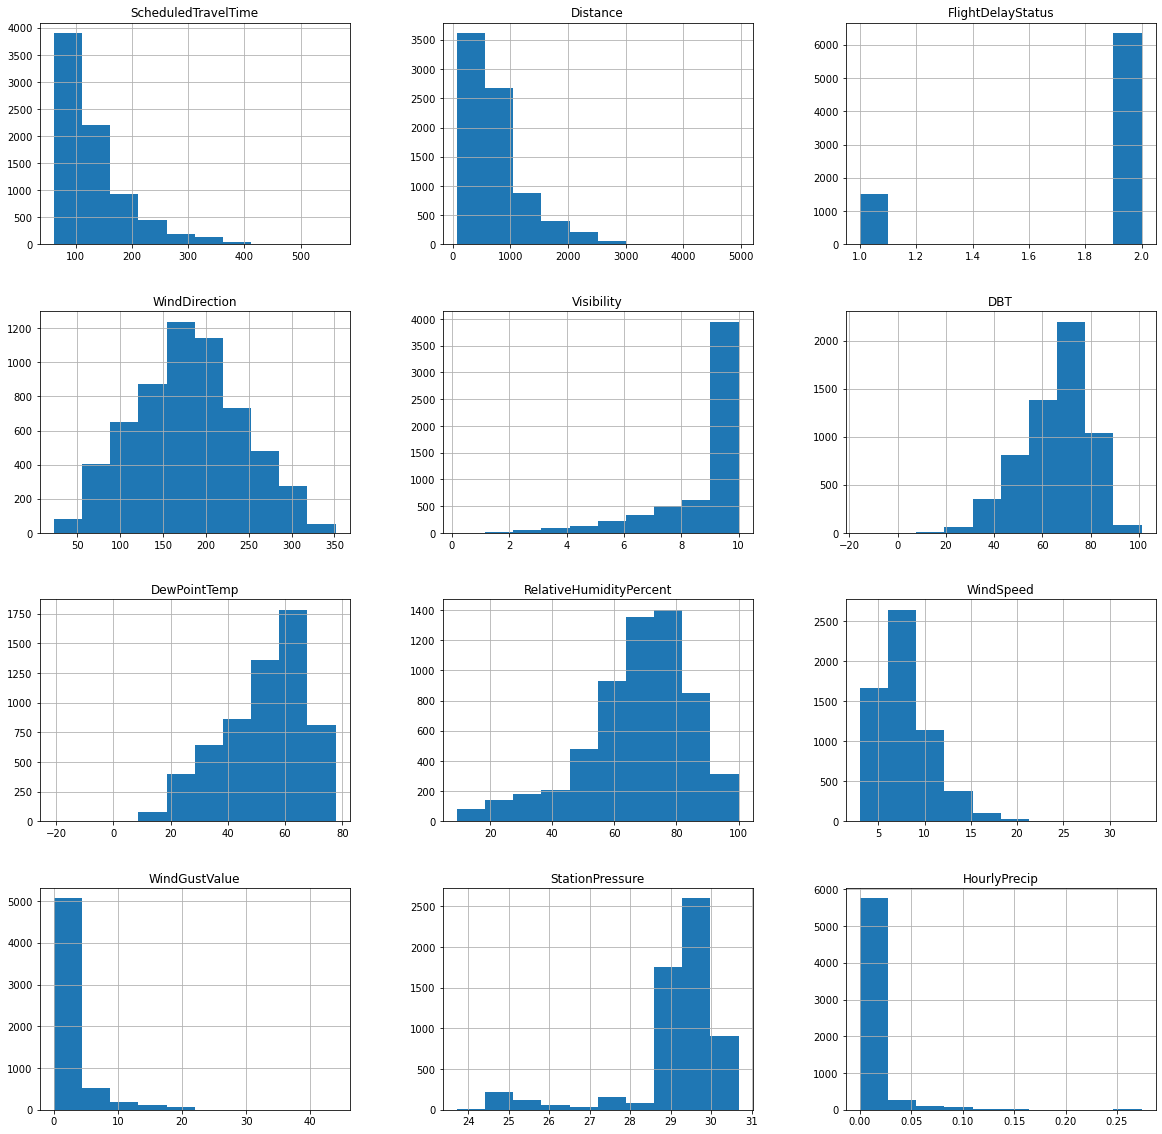

In [89]:
trainfinal.hist(figsize=(20,20))

In [90]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
trainfinal[['Destination']] = ohe.fit_transform(trainfinal[['Destination']])

In [91]:
trainfinal.dtypes

ScheduledDepTime            object
ScheduledArrTime            object
ScheduledTravelTime          int64
Destination                 object
Distance                     int64
ArrivalDate                 object
FlightDelayStatus            int64
WindDirection              float64
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

In [92]:
trainfinal.head()

,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Destination,Distance,ArrivalDate,FlightDelayStatus,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip
0,1000,1154,114,"(0, 43)\t1.0",563,20040920,2,130.50,10.00,60.50,45.30,61.20,6.00,0.00,29.49,0.000
1,1440,1634,114,"(0, 13)\t1.0",554,20041119,1,153.81,6.19,59.00,52.57,80.14,5.67,0.00,29.08,0.004
2,1800,1902,62,"(0, 115)\t1.0",226,20040405,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1400,1533,93,"(0, 207)\t1.0",508,20040607,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0830,0946,76,"(0, 155)\t1.0",334,20040923,2,187.73,9.45,72.77,53.18,53.36,7.05,2.41,29.43,0.000


In [93]:
trainfinal.dropna(inplace=True,axis=0)

In [94]:
#trainfinal = trainfinal.astype(int)

In [95]:
trainfinal.shape

(5946, 16)

In [96]:
trainfinal.head()

,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Destination,Distance,ArrivalDate,FlightDelayStatus,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip
0,1000,1154,114,"(0, 43)\t1.0",563,20040920,2,130.50,10.00,60.50,45.30,61.20,6.00,0.00,29.49,0.000
1,1440,1634,114,"(0, 13)\t1.0",554,20041119,1,153.81,6.19,59.00,52.57,80.14,5.67,0.00,29.08,0.004
4,0830,0946,76,"(0, 155)\t1.0",334,20040923,2,187.73,9.45,72.77,53.18,53.36,7.05,2.41,29.43,0.000
5,1730,1832,62,"(0, 86)\t1.0",268,20040926,2,164.17,10.00,65.08,45.92,54.00,3.92,0.00,29.34,0.000
6,1330,1517,107,"(0, 202)\t1.0",551,20040505,2,172.50,9.40,71.30,56.55,62.60,6.30,0.80,29.20,0.000


In [97]:
to_submit = trainfinal
#to_submit.to_csv("trainfinal.csv",index=False)

In [98]:
target = trainfinal["FlightDelayStatus"]
target.shape

(5946,)

In [99]:
test = pd.read_csv("Test.csv")

In [100]:
test.head(4)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278
2,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,239
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515


In [101]:
test.shape

(6566, 11)

In [102]:
train.shape

(7861, 10)

In [103]:
test["DayofMonth"]= test.DayofMonth.map("{:02}".format)

In [104]:
test["Month"]= test.Month.map("{:02}".format)

In [105]:
test.head(4)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,DEN_XNA_62349,2005,09,12,1,1516,1756,100,DEN,XNA,616
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278
2,IAD_GSO_86576,2005,09,28,3,1040,1144,64,IAD,GSO,239
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515


In [106]:
test["YearMonthDay"]=test["Year"].astype(str)+test["Month"].astype(str)+test["DayofMonth"].astype(str)

In [107]:
test.head(4)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay
0,DEN_XNA_62349,2005,09,12,1,1516,1756,100,DEN,XNA,616,20050912
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278,20051114
2,IAD_GSO_86576,2005,09,28,3,1040,1144,64,IAD,GSO,239,20050928
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515,20051118


In [108]:
test.drop(columns=["Year","Month","DayofMonth","DayOfWeek"],axis=1,inplace= True)

In [109]:
test.head(4)

,FlightNumber,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay
0,DEN_XNA_62349,1516,1756,100,DEN,XNA,616,20050912
1,RIC_EWR_87213,1300,1415,75,RIC,EWR,278,20051114
2,IAD_GSO_86576,1040,1144,64,IAD,GSO,239,20050928
3,SAV_CVG_87264,1120,1302,102,SAV,CVG,515,20051118


In [110]:
test["ScheduledDepTime"]=test.ScheduledDepTime.map("{:04}".format)
test["ScheduledArrTime"]=test.ScheduledArrTime.map("{:04}".format)

In [111]:
test.head(4)

,FlightNumber,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay
0,DEN_XNA_62349,1516,1756,100,DEN,XNA,616,20050912
1,RIC_EWR_87213,1300,1415,75,RIC,EWR,278,20051114
2,IAD_GSO_86576,1040,1144,64,IAD,GSO,239,20050928
3,SAV_CVG_87264,1120,1302,102,SAV,CVG,515,20051118


In [112]:
test.dtypes

FlightNumber           object
ScheduledDepTime       object
ScheduledArrTime       object
ScheduledTravelTime     int64
Origin                 object
Destination            object
Distance                int64
YearMonthDay           object
dtype: object

In [113]:
hpd_testr_df = pd.concat(
   map(pd.read_csv, ['2005data/200503hpd.txt','2005data/200507hpd.txt','2005data/200509hpd.txt','2005data/200511hpd.txt']), ignore_index=True)

In [114]:
hpd_testr_df.shape

(4410021, 4)

In [115]:
hpd_testr_df.isna().sum()

WeatherStationID         0
YearMonthDay             0
Time                     0
HourlyPrecip        143894
dtype: int64

In [116]:
#hpd2005.dropna(axis=0,inplace=True)
hpd_testr_df = hpd_testr_df.replace(np.nan,0)

In [117]:
hpd_testr_df.isna().sum()

WeatherStationID    0
YearMonthDay        0
Time                0
HourlyPrecip        0
dtype: int64

In [118]:
(hpd_testr_df==0).sum()

WeatherStationID          0
YearMonthDay              0
Time                      0
HourlyPrecip        4265122
dtype: int64

In [119]:
(hpd_testr_df==0).mean()

WeatherStationID    0.000000
YearMonthDay        0.000000
Time                0.000000
HourlyPrecip        0.967143
dtype: float64

In [120]:
hpd_testr_df = hpd_testr_df.groupby(["YearMonthDay","WeatherStationID"],as_index=False).agg({"HourlyPrecip":np.mean})

In [121]:
hpd_testr_df.shape

(193111, 3)

In [122]:
hpd_testr_df["YearMonthDay"].nunique()

122

In [123]:
hpd_testr_df.head(10)

,YearMonthDay,WeatherStationID,HourlyPrecip
0,20050301,3011,0.000000
1,20050301,3012,0.000000
2,20050301,3013,0.000000
3,20050301,3016,0.000417
4,20050301,3017,0.000000
5,20050301,3024,0.000000
6,20050301,3026,0.000000
7,20050301,3027,0.000000
8,20050301,3028,0.000000
9,20050301,3029,0.003750


In [124]:
hours_test_df = pd.concat(
   map(pd.read_csv, ['2005data/200503hourly.txt','2005data/200507hourly.txt','2005data/200509hourly.txt','2005data/200511hourly.txt']), ignore_index=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6220\265414789.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hours_test_df = pd.concat(
C:\Users\Asus\AppData\Local\Temp\ipykernel_6220\265414789.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hours_test_df = pd.concat(
C:\Users\Asus\AppData\Local\Temp\ipykernel_6220\265414789.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hours_test_df = pd.concat(
C:\Users\Asus\AppData\Local\Temp\ipykernel_6220\265414789.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hours_test_df = pd.concat(


In [125]:
hours_test_df.shape

(5031729, 12)

In [126]:
hours_test_df.isna().sum()

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               134081
Visibility                  123115
DBT                        1099802
DewPointTemp               1112107
RelativeHumidityPercent    1115678
WindSpeed                    32534
WindDirection                32590
WindGustValue                41952
StationPressure             629885
dtype: int64

In [127]:
hours_test_df = hours_test_df.replace(np.nan,0)
#hourly.dropna(axis=0,inplace=True)

In [128]:
hours_test_df.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

In [129]:
hours_test_df["Visibility"].isna().sum()

0

In [130]:
hours_test_df["Visibility"]= hours_test_df["Visibility"].str.extract("(\d+)").astype(float)

In [131]:
hours_test_df.head(5)

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,4843,20050301,10,FEW008 SCT012 OVC026,1.0,0.0,0.0,0.0,6.0,VRB,0.0,0.0
1,13874,20050301,10,SCT023 BKN030,10.0,0.0,0.0,0.0,14.0,310,0.0,0.0
2,14765,20050301,10,FEW007 SCT010 OVC015,2.0,0.0,0.0,0.0,19.0,030,26.0,0.0
3,14777,20050301,10,OVC011,2.0,0.0,0.0,0.0,5.0,040,0.0,0.0
4,14819,20050301,10,FEW015 OVC060,2.0,0.0,0.0,0.0,9.0,310,0.0,0.0


In [132]:
#droping rows wher wind parameters are all equal to zero 
itsnill = hours_test_df[(hours_test_df["WindSpeed"]==0)&(hours_test_df["WindDirection"]==0)&(hours_test_df["WindGustValue"]==0)].index
hours_test_df.drop(itsnill,inplace=True)

In [133]:
hours_test_df.shape

(4999232, 12)

In [134]:
(hours_test_df["WindDirection"]=="VRB").sum()

215695

In [135]:
hours_test_df["WindDirection"] = hours_test_df["WindDirection"].replace("VRB","30")

In [136]:
hours_test_df["WindDirection"] = hours_test_df["WindDirection"].astype(int)

In [137]:
hours_test_df["WindSpeed"].value_counts()

0.0     857414
4.0     432829
5.0     427279
3.0     412387
6.0     395578
         ...  
77           1
80           1
75           1
85           1
96.0         1
Name: WindSpeed, Length: 170, dtype: int64

In [138]:
hours_test_df["WindSpeed"] = hours_test_df["WindSpeed"].replace("-1.0",1)

In [139]:
hours_test_df["WindSpeed"] = hours_test_df["WindSpeed"].replace("/1",1)
hours_test_df["WindSpeed"] = hours_test_df["WindSpeed"].replace("/0",1)

In [140]:
hours_test_df["WindSpeed"] = hours_test_df["WindSpeed"].replace(".",0)

In [141]:
hours_test_df["WindSpeed"] = hours_test_df["WindSpeed"].astype(int)

In [142]:
hours_test_df = hours_test_df.groupby(["YearMonthDay","WeatherStationID"],as_index=False).agg({"WindDirection":np.mean,"Visibility":np.mean,"DBT":np.mean,"DewPointTemp":np.mean,"RelativeHumidityPercent":np.mean,"WindSpeed":np.mean,"WindGustValue":np.mean,"StationPressure":np.mean})

In [143]:
hours_test_df.shape

(192649, 10)

In [144]:
hours_test_df = hours_test_df.round(2)
hours_test_df.head(5)

,YearMonthDay,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure
0,20050301,3011,95.86,7.62,21.00,15.66,57.76,2.93,0.00,30.03
1,20050301,3012,162.92,10.00,32.21,21.67,68.25,5.04,0.83,30.01
2,20050301,3013,150.83,10.00,33.75,16.38,56.21,3.17,0.00,26.18
3,20050301,3016,138.71,8.19,26.94,19.35,54.55,5.03,2.13,18.99
4,20050301,3017,162.08,10.00,39.29,16.54,44.29,7.42,0.62,24.55


In [145]:
weather2005 = pd.merge(hours_test_df,hpd_testr_df,how="right",on=["YearMonthDay","WeatherStationID"])

In [146]:
weather2005.shape

(193111, 11)

In [147]:
weather2005.head(25)

,YearMonthDay,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip
0,20050301,3011,95.86,7.62,21.00,15.66,57.76,2.93,0.00,30.03,0.000000
1,20050301,3012,162.92,10.00,32.21,21.67,68.25,5.04,0.83,30.01,0.000000
2,20050301,3013,150.83,10.00,33.75,16.38,56.21,3.17,0.00,26.18,0.000000
3,20050301,3016,138.71,8.19,26.94,19.35,54.55,5.03,2.13,18.99,0.000417
4,20050301,3017,162.08,10.00,39.29,16.54,44.29,7.42,0.62,24.55,0.000000
5,20050301,3024,145.42,10.00,39.88,18.25,43.75,7.21,4.17,26.89,0.000000
6,20050301,3026,203.75,10.00,38.17,11.58,35.96,8.92,0.83,25.65,0.000000
7,20050301,3027,280.00,10.00,34.71,22.50,62.29,11.83,5.21,23.06,0.000000
8,20050301,3028,167.92,NaN,37.79,17.54,49.00,6.75,0.58,25.48,0.000000
9,20050301,3029,105.09,5.74,15.33,11.95,32.02,2.46,0.26,9.86,0.003750


In [148]:
weather2005.isna().sum()

YearMonthDay                  0
WeatherStationID              0
WindDirection               885
Visibility                 4930
DBT                         885
DewPointTemp                885
RelativeHumidityPercent     885
WindSpeed                   885
WindGustValue               885
StationPressure             885
HourlyPrecip                  0
dtype: int64

In [149]:
weather2005 = weather2005.replace(np.nan,0)

In [150]:
weather2005.isna().sum()

YearMonthDay               0
WeatherStationID           0
WindDirection              0
Visibility                 0
DBT                        0
DewPointTemp               0
RelativeHumidityPercent    0
WindSpeed                  0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
dtype: int64

In [151]:
stations2005 = pd.read_csv("AllStationsData_PHD.txt",sep ="|")

In [152]:
stations2005.shape

(1744, 8)

In [153]:
stations2005 = stations2005.drop(["GroundHeight","StationHeight","Latitude","Longitude","TimeZone"],axis=1)

In [154]:
weatherfinal2005 = pd.merge(weather2005,stations2005,how="left",on=["WeatherStationID"])

In [155]:
weatherfinal2005.shape

(193111, 13)

In [156]:
weatherfinal2005 = weatherfinal2005.rename(columns={"AirportID":"Destination"})

In [157]:
weatherfinal2005.head(5)

,YearMonthDay,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip,Destination,BarometerHeight
0,20050301,3011,95.86,7.62,21.00,15.66,57.76,2.93,0.00,30.03,0.000000,TEX,0.0
1,20050301,3012,162.92,10.00,32.21,21.67,68.25,5.04,0.83,30.01,0.000000,SKX,0.0
2,20050301,3013,150.83,10.00,33.75,16.38,56.21,3.17,0.00,26.18,0.000000,LAA,3675.0
3,20050301,3016,138.71,8.19,26.94,19.35,54.55,5.03,2.13,18.99,0.000417,RIL,5506.0
4,20050301,3017,162.08,10.00,39.29,16.54,44.29,7.42,0.62,24.55,0.000000,DEN,5382.0


In [158]:
weatherfinal2005.isna().sum()

YearMonthDay                 0
WeatherStationID             0
WindDirection                0
Visibility                   0
DBT                          0
DewPointTemp                 0
RelativeHumidityPercent      0
WindSpeed                    0
WindGustValue                0
StationPressure              0
HourlyPrecip                 0
Destination                167
BarometerHeight            167
dtype: int64

In [159]:
weatherfinal2005.dropna(axis=0,inplace=True)

In [160]:
weatherfinal2005.isna().sum()

YearMonthDay               0
WeatherStationID           0
WindDirection              0
Visibility                 0
DBT                        0
DewPointTemp               0
RelativeHumidityPercent    0
WindSpeed                  0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
Destination                0
BarometerHeight            0
dtype: int64

In [161]:
weatherfinal2005.dtypes

YearMonthDay                 int64
WeatherStationID             int64
WindDirection              float64
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
Destination                 object
BarometerHeight            float64
dtype: object

In [162]:
test.dtypes

FlightNumber           object
ScheduledDepTime       object
ScheduledArrTime       object
ScheduledTravelTime     int64
Origin                 object
Destination            object
Distance                int64
YearMonthDay           object
dtype: object

In [163]:
test.YearMonthDay = test.YearMonthDay.astype(str)
weatherfinal2005.YearMonthDay = weatherfinal2005.YearMonthDay.astype(str)

In [164]:
testfinal = pd.merge(test,weatherfinal2005,how = "left",on=["Destination","YearMonthDay"])

In [165]:
testfinal.head(15)

,FlightNumber,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,WeatherStationID,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip,BarometerHeight
0,DEN_XNA_62349,1516,1756,100,DEN,XNA,616,20050912,53922,171.67,7.46,76.12,58.33,56.42,7.46,1.67,28.71,0.000000,1272.0
1,RIC_EWR_87213,1300,1415,75,RIC,EWR,278,20051114,14734,236.25,10.00,59.08,36.88,48.12,10.00,1.50,30.23,0.000000,28.0
2,IAD_GSO_86576,1040,1144,64,IAD,GSO,239,20050928,13723,74.48,10.00,57.86,47.38,54.76,5.48,0.00,24.12,0.000000,907.0
3,SAV_CVG_87264,1120,1302,102,SAV,CVG,515,20051118,93814,150.42,9.54,28.42,16.79,64.88,5.17,0.00,29.39,0.000000,885.0
4,SBP_LAX_68158,0630,0733,63,SBP,LAX,155,20050705,23174,185.93,4.89,56.59,51.11,71.89,6.59,1.41,26.29,0.000000,326.0
5,LGA_PWM_89349,1310,1427,77,LGA,PWM,270,20050915,14764,133.89,5.04,30.61,29.69,41.43,4.56,0.00,13.33,0.028333,72.0
6,STL_LIT_83427,1230,1335,65,STL,LIT,296,20050918,13963,96.67,7.25,81.21,68.75,68.96,4.88,0.00,29.70,0.000000,292.0
7,ORD_STL_101923,1616,1735,79,ORD,STL,258,20050304,13994,274.17,9.92,52.92,35.12,56.08,9.62,2.62,29.14,0.000000,710.0
8,ONT_PHX_70779,1045,1155,70,ONT,PHX,325,20050906,23183,192.50,10.00,95.92,47.92,20.75,4.75,0.67,28.71,0.000000,1106.0
9,LGA_MIA_65916,1420,1719,179,LGA,MIA,1097,20050902,12839,136.15,9.62,76.12,69.92,75.04,4.58,0.88,27.62,0.017500,29.0


In [166]:
testfinal.shape

(6566, 19)

In [167]:
test.shape

(6566, 8)

In [168]:
testfinal.isna().sum()

FlightNumber               0
ScheduledDepTime           0
ScheduledArrTime           0
ScheduledTravelTime        0
Origin                     0
Destination                0
Distance                   0
YearMonthDay               0
WeatherStationID           0
WindDirection              0
Visibility                 0
DBT                        0
DewPointTemp               0
RelativeHumidityPercent    0
WindSpeed                  0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
BarometerHeight            0
dtype: int64

In [169]:
testfinal = testfinal.drop("Origin",axis=1)
testfinal = testfinal.drop("WeatherStationID",axis=1)
testfinal = testfinal.drop("FlightNumber",axis=1)
testfinal = testfinal.rename(columns={"YearMonthDay":"ArrivalDate"})

In [170]:
trainfinal.head()

,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Destination,Distance,ArrivalDate,FlightDelayStatus,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip
0,1000,1154,114,"(0, 43)\t1.0",563,20040920,2,130.50,10.00,60.50,45.30,61.20,6.00,0.00,29.49,0.000
1,1440,1634,114,"(0, 13)\t1.0",554,20041119,1,153.81,6.19,59.00,52.57,80.14,5.67,0.00,29.08,0.004
4,0830,0946,76,"(0, 155)\t1.0",334,20040923,2,187.73,9.45,72.77,53.18,53.36,7.05,2.41,29.43,0.000
5,1730,1832,62,"(0, 86)\t1.0",268,20040926,2,164.17,10.00,65.08,45.92,54.00,3.92,0.00,29.34,0.000
6,1330,1517,107,"(0, 202)\t1.0",551,20040505,2,172.50,9.40,71.30,56.55,62.60,6.30,0.80,29.20,0.000


In [171]:
testfinal.head()

,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Destination,Distance,ArrivalDate,WindDirection,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindGustValue,StationPressure,HourlyPrecip,BarometerHeight
0,1516,1756,100,XNA,616,20050912,171.67,7.46,76.12,58.33,56.42,7.46,1.67,28.71,0.0,1272.0
1,1300,1415,75,EWR,278,20051114,236.25,10.00,59.08,36.88,48.12,10.00,1.50,30.23,0.0,28.0
2,1040,1144,64,GSO,239,20050928,74.48,10.00,57.86,47.38,54.76,5.48,0.00,24.12,0.0,907.0
3,1120,1302,102,CVG,515,20051118,150.42,9.54,28.42,16.79,64.88,5.17,0.00,29.39,0.0,885.0
4,0630,0733,63,LAX,155,20050705,185.93,4.89,56.59,51.11,71.89,6.59,1.41,26.29,0.0,326.0


In [172]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
testfinal[['Destination']] = ohe.fit_transform(testfinal[['Destination']])
testfinal = testfinal.drop(["DBT","DewPointTemp","WindGustValue","Destination","BarometerHeight","ScheduledArrTime","ScheduledDepTime"],axis=1)

In [173]:
trainfinal = trainfinal.drop(["DBT","DewPointTemp","WindGustValue","Destination","ScheduledArrTime","ScheduledDepTime","FlightDelayStatus"],axis=1)

In [174]:
trainfinal.shape

(5946, 9)

In [175]:
testfinal.shape

(6566, 9)

In [176]:
trainfinal.dtypes

ScheduledTravelTime          int64
Distance                     int64
ArrivalDate                 object
WindDirection              float64
Visibility                 float64
RelativeHumidityPercent    float64
WindSpeed                  float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

In [177]:
testfinal.dtypes

ScheduledTravelTime          int64
Distance                     int64
ArrivalDate                 object
WindDirection              float64
Visibility                 float64
RelativeHumidityPercent    float64
WindSpeed                  float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

In [178]:
trainfinal.head()

,ScheduledTravelTime,Distance,ArrivalDate,WindDirection,Visibility,RelativeHumidityPercent,WindSpeed,StationPressure,HourlyPrecip
0,114,563,20040920,130.50,10.00,61.20,6.00,29.49,0.000
1,114,554,20041119,153.81,6.19,80.14,5.67,29.08,0.004
4,76,334,20040923,187.73,9.45,53.36,7.05,29.43,0.000
5,62,268,20040926,164.17,10.00,54.00,3.92,29.34,0.000
6,107,551,20040505,172.50,9.40,62.60,6.30,29.20,0.000


In [179]:
#Applying ML MODEL 

In [180]:
x = trainfinal
y = target
f_test = testfinal

In [181]:
y.shape

(5946,)

In [182]:
x.shape

(5946, 9)

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
#Gini index is a measure of impurity1
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(x,y)
y_pred=dt.predict(f_test)

In [185]:
print(y_pred)

[2 2 2 ... 2 2 2]


In [186]:
test["FlightDelayStatus"]= y_pred
to_submit = test[["FlightNumber","FlightDelayStatus"]]
to_submit.to_csv("Flight_delay_status_DTC.csv",index=False)

In [187]:
df = pd.read_csv("Flight_delay_status_DTC.csv",index_col="FlightNumber")

In [188]:
df.head(12)

,FlightDelayStatus
FlightNumber,
DEN_XNA_62349,2
RIC_EWR_87213,2
IAD_GSO_86576,2
SAV_CVG_87264,2
SBP_LAX_68158,1
LGA_PWM_89349,1
STL_LIT_83427,1
ORD_STL_101923,2
ONT_PHX_70779,2


In [189]:
df["FlightDelayStatus"].value_counts()

2    5543
1    1023
Name: FlightDelayStatus, dtype: int64

In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=15)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.38      0.37      0.38       356
           2       0.84      0.85      0.85      1428

    accuracy                           0.75      1784
   macro avg       0.61      0.61      0.61      1784
weighted avg       0.75      0.75      0.75      1784



In [191]:
from sklearn import metrics
print("F1 score:",metrics.f1_score(y_test, y_pred2))

F1 score: 0.3773049645390072


In [192]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
f_test = ss.fit_transform(f_test)

In [193]:
rf = RandomForestClassifier(criterion="entropy")
rf.fit(x,y)
y_pred3=rf.predict(f_test)

In [194]:
test["FlightDelayStatus"]= y_pred3
to_submit = test[["FlightNumber","FlightDelayStatus"]]
to_submit.to_csv("submission6.csv",index=False)

In [195]:
df = pd.read_csv("submission6.csv",index_col="FlightNumber")

In [196]:
df["FlightDelayStatus"].value_counts()

2    6157
1     409
Name: FlightDelayStatus, dtype: int64

In [197]:
from sklearn.neighbors import NearestCentroid
model = NearestCentroid()
model.fit(x, y.values.ravel())
y_pred_cent=model.predict(f_test)
print("1's = ",np.count_nonzero(y_pred_cent==1))
print("2's = ",np.count_nonzero(y_pred_cent==2))


1's =  2103
2's =  4463


In [198]:
test["FlightDelayStatus"]= y_pred_cent
to_submit = test[["FlightNumber","FlightDelayStatus"]]
to_submit.to_csv("submission7.csv",index=False)